<a href="https://colab.research.google.com/github/takakurahashi/github.io/blob/master/%E8%87%AA%E5%8B%95%E8%BB%8A%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E9%87%8D%E5%9B%9E%E5%B8%B0%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [2]:
import requests, zipfile
import io

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content
auto = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
auto.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
               'body-style','drive-whiles','engine-location','while-base','length','width','height',
              'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
              'stroke','comoression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [3]:
# 何行何列のデータか確認
print('自動車データの形成：{}'.format(auto.shape))

自動車データの形成：(205, 26)


In [4]:
# データの表示
auto.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-whiles,engine-location,while-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,comoression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [5]:
auto.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-whiles,engine-location,while-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,comoression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [6]:
auto = auto[['while-base','length','width','height','curb-weight','engine-size','bore','stroke','comoression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']]
# データの整理

In [7]:
# 指定カラムにある？の数を確認

auto.isin(['?']).sum()

while-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 4
stroke               4
comoression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [8]:
# 指定カラムにあるNULLの数を確認
auto.isnull().sum()

while-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
comoression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
# ?をNANに置換してNANがある行を削除
auto = auto.replace('?',np.nan).dropna()
print('自動車データの形式：{}'.format(auto.shape))

自動車データの形式：(195, 14)


In [10]:
print('データ型の確認\n{}\n'.format(auto.dtypes))

データ型の確認
while-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
comoression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object



In [11]:
#　データ型の変換object型をint型に変換
# auto = auto.assign(horsepower = pd.to_numeric(auto.horsepower))
auto = auto.astype(float)
print('データの確認\n{}\n'.format(auto.dtypes))

データの確認
while-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
comoression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


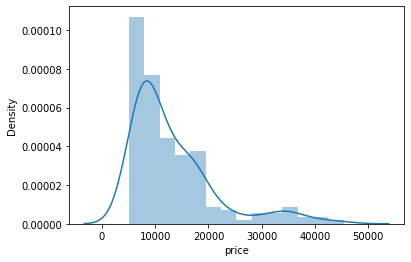

In [12]:
sns.distplot(auto['price'])
# 価格帯は安めが多いのではないかという予想が立つ

In [13]:
q = auto['price'].quantile(0.95)
auto = auto[auto['price']<q]
auto.describe(include='all')
# 外れ値の外し方（外れ値を外すと精度の高いデータが取れる）

,while-base,length,width,height,curb-weight,engine-size,bore,stroke,comoression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,98.552432,173.351351,65.691351,53.890811,2505.448649,121.502703,3.312541,3.250811,10.274703,98.616216,5100.270270,25.918919,31.448649,11929.524324
std,5.615933,11.780645,1.925439,2.369937,473.273807,29.622466,0.267520,0.310205,4.148372,32.254402,466.150321,6.107632,6.432662,5802.780353
min,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,19.000000,5118.000000
25%,94.500000,166.300000,64.000000,52.000000,2128.000000,98.000000,3.150000,3.120000,8.600000,70.000000,4800.000000,21.000000,26.000000,7609.000000
50%,97.000000,173.000000,65.400000,54.100000,2403.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5100.000000,25.000000,31.000000,9980.000000
75%,101.200000,180.200000,66.500000,55.600000,2847.000000,141.000000,3.580000,3.410000,9.400000,115.000000,5500.000000,31.000000,37.000000,15690.000000
max,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,207.000000,6600.000000,49.000000,54.000000,32528.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


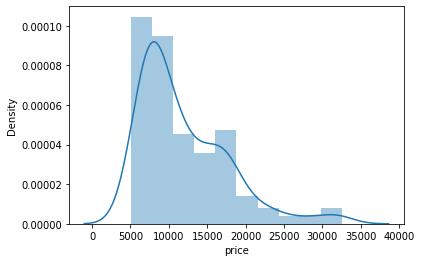

In [14]:
sns.distplot(auto['price'])

In [15]:
auto.corr()

,while-base,length,width,height,curb-weight,engine-size,bore,stroke,comoression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
while-base,1.000000,0.871261,0.815299,0.621683,0.792639,0.568233,0.506146,0.133021,0.315740,0.367153,-0.320908,-0.482667,-0.540877,0.640664
length,0.871261,1.000000,0.842245,0.535114,0.875937,0.689358,0.598165,0.096959,0.211081,0.563232,-0.261887,-0.664335,-0.686781,0.720570
width,0.815299,0.842245,1.000000,0.361716,0.842454,0.701271,0.529801,0.199421,0.262374,0.578019,-0.223130,-0.604362,-0.637079,0.759210
height,0.621683,0.535114,0.361716,1.000000,0.382617,0.104770,0.212635,-0.092486,0.281479,-0.032943,-0.261050,-0.135896,-0.185997,0.244169
curb-weight,0.792639,0.875937,0.842454,0.382617,1.000000,0.860572,0.634852,0.178812,0.222610,0.729453,-0.275961,-0.740259,-0.776754,0.847428
engine-size,0.568233,0.689358,0.701271,0.104770,0.860572,1.000000,0.601247,0.315454,0.112514,0.818457,-0.246038,-0.702029,-0.707607,0.830618
bore,0.506146,0.598165,0.529801,0.212635,0.634852,0.601247,1.000000,-0.073761,0.027747,0.532406,-0.300956,-0.554357,-0.568221,0.524054
stroke,0.133021,0.096959,0.199421,-0.092486,0.178812,0.315454,-0.073761,1.000000,0.219748,0.158809,-0.044539,-0.031605,-0.036407,0.137784
comoression-ratio,0.315740,0.211081,0.262374,0.281479,0.222610,0.112514,0.027747,0.219748,1.000000,-0.217073,-0.467095,0.325567,0.256855,0.188420
horsepower,0.367153,0.563232,0.578019,-0.032943,0.729453,0.818457,0.532406,0.158809,-0.217073,1.000000,0.117447,-0.826033,-0.804658,0.752002


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = auto.drop('price',axis=1)
y = auto['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)

In [18]:
X_train.head()

,while-base,length,width,height,curb-weight,engine-size,bore,stroke,comoression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
150,95.7,158.7,63.6,54.5,1985.0,92.0,3.05,3.03,9.0,62.0,4800.0,35.0,39.0
46,96.0,172.6,65.2,51.4,2734.0,119.0,3.43,3.23,9.2,90.0,5000.0,24.0,29.0
84,95.9,173.2,66.3,50.2,2926.0,156.0,3.59,3.86,7.0,145.0,5000.0,19.0,24.0
60,98.8,177.8,66.5,55.5,2410.0,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0
59,98.8,177.8,66.5,53.7,2385.0,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0


In [19]:
y_train.head()

150     5348.0
46     11048.0
84     14489.0
60      8495.0
59      8845.0
Name: price, dtype: float64

In [20]:
# 関連するモジュールのインポート
from sklearn.feature_selection import f_regression

In [21]:
f_regression(X_train,y_train)

(array([114.726, 136.554, 129.71 ,   6.869, 335.212, 201.81 ,  26.672,
          3.871,   4.165, 113.714,   4.578,  81.487,  99.36 ]),
 array([9.635e-18, 9.742e-20, 3.913e-19, 1.029e-02, 4.243e-32, 1.030e-24,
        1.435e-06, 5.221e-02, 4.419e-02, 1.207e-17, 3.509e-02, 3.025e-14,
        3.330e-16]))

In [22]:
# p値を求めます
p_values = f_regression(X_train,y_train)[1]
p_values

array([9.635e-18, 9.742e-20, 3.913e-19, 1.029e-02, 4.243e-32, 1.030e-24,
       1.435e-06, 5.221e-02, 4.419e-02, 1.207e-17, 3.509e-02, 3.025e-14,
       3.330e-16])

In [23]:
# 評価を簡単にするために、小数点以下3桁で丸めます
p_values.round(3)

array([0.   , 0.   , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.052, 0.044,
       0.   , 0.035, 0.   , 0.   ])

In [24]:
[(i,v) for i, v in zip(X_train.columns,p_values.round(3))]

[('while-base', 0.000),
 ('length', 0.000),
 ('width', 0.000),
 ('height', 0.010),
 ('curb-weight', 0.000),
 ('engine-size', 0.000),
 ('bore', 0.000),
 ('stroke', 0.052),
 ('comoression-ratio', 0.044),
 ('horsepower', 0.000),
 ('peak-rpm', 0.035),
 ('city-mpg', 0.000),
 ('highway-mpg', 0.000)]

In [25]:
X_train = X_train.drop(['height','stroke','comoression-ratio','peak-rpm'],axis=1)
X_test = X_test.drop(['height','stroke','comoression-ratio','peak-rpm'],axis=1)
# 不要な説明変数の削除

In [27]:
print('決定係数(train):{:.3f}'.format(model.score(X_train,y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,y_test)))

決定係数(train):0.806
決定係数(test):0.685


In [28]:
model.coef_
# 回帰係数

array([  133.65 ,   -43.634,    65.626,     9.486,    31.175, -2680.334,
           4.788,  -256.629,   258.802])

In [29]:
print('\n回帰係数\n{}'.format(pd.Series(model.coef_, index=X_train.columns)))
print('切片:{:.3f}'.format(model.intercept_))


回帰係数
while-base      133.649939
length          -43.633561
width            65.626427
curb-weight       9.486205
engine-size      31.174795
bore          -2680.334370
horsepower        4.787807
city-mpg       -256.629406
highway-mpg     258.801660
dtype: float64
切片:-18549.478


In [30]:
reg_summary = pd.DataFrame(data = X_train.columns.values, columns=['Features'])
reg_summary

,Features
0,while-base
1,length
2,width
3,curb-weight
4,engine-size
5,bore
6,horsepower
7,city-mpg
8,highway-mpg


In [31]:
# X_trainの説明変数を変更したので、再度p値を求めます
p_values = f_regression(X_train,y_train)[1]
p_values

array([9.635e-18, 9.742e-20, 3.913e-19, 4.243e-32, 1.030e-24, 1.435e-06,
       1.207e-17, 3.025e-14, 3.330e-16])

In [32]:
reg_summary ['Coefficients'] = model.coef_
reg_summary ['p-values'] = p_values.round(3)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = auto[['length','width','city-mpg']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif
# 多重共線性
# VIF=1なら多重共線性はない
# VIF=1から5までなら問題ない値
# VIF>5なら多重共線性あり

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF,Features
0,775.358637,length
1,972.854593,width
2,26.700322,city-mpg
